In [337]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

%matplotlib inline

# Time series

## time in Pandas

In [338]:
ts = pd.read_csv('timeseries.csv')

In [339]:
ts

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [340]:
ts.dtypes

date      object
value    float64
year       int64
month     object
dtype: object

In [278]:
ts.date[2] #look at it

'1991-09-01'

In [341]:
type(ts.date[2])

str

In [280]:
pd.to_datetime('1991-09-01')

Timestamp('1991-09-01 00:00:00')

In [342]:
dtime = pd.to_datetime(ts.date[2])
dtime

Timestamp('1991-09-01 00:00:00')

In [345]:
s1 = pd.to_datetime(['2/5-10'], format='%d/%m-%y')

In [346]:
s1

DatetimeIndex(['2010-05-02'], dtype='datetime64[ns]', freq=None)

In [347]:
s2 = pd.to_datetime(['2/5-10'], format='%m/%d-%y')

In [348]:
s2

DatetimeIndex(['2010-02-05'], dtype='datetime64[ns]', freq=None)

In [349]:
dtime.month, dtime.day, dtime.year

(9, 1, 1991)

### timedelta

In [350]:
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
td = pd.Series([ pd.Timedelta(days=i) for i in range(3) ])
df = pd.DataFrame(dict(A = s, B = td))
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [351]:
df.B[2] #timedelta

Timedelta('2 days 00:00:00')

In [352]:
df.B[2]+s2 #add timedelta to date

DatetimeIndex(['2010-02-07'], dtype='datetime64[ns]', freq=None)

In [357]:
between_days = s2-s1 #operations with dates
between_days, s2, s1

(TimedeltaIndex(['-86 days'], dtype='timedelta64[ns]', freq=None),
 DatetimeIndex(['2010-02-05'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2010-05-02'], dtype='datetime64[ns]', freq=None))

In [358]:
between_days + dtime

DatetimeIndex(['1991-06-07'], dtype='datetime64[ns]', freq=None)

In [252]:
df.A.shift(-1) # produces NaT (time NaN)

0   2012-01-02
1   2012-01-03
2          NaT
Name: A, dtype: datetime64[ns]

In [359]:
df.A + pd.DateOffset(days=1) # clean, no NaN

0   2012-01-02
1   2012-01-03
2   2012-01-04
Name: A, dtype: datetime64[ns]

## time in Python: datetime

In [360]:
from datetime import datetime, timedelta

In [364]:
d = datetime.today() + timedelta(hours=6, minutes=50)
d.strftime('%H:%M %p')

'16:42 PM'

### back to time series column in Pandas

In [365]:
ts

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [366]:
pd.to_datetime(ts.date)

0     1991-07-01
1     1991-08-01
2     1991-09-01
3     1991-10-01
4     1991-11-01
         ...    
199   2008-02-01
200   2008-03-01
201   2008-04-01
202   2008-05-01
203   2008-06-01
Name: date, Length: 204, dtype: datetime64[ns]

In [367]:
ts['date'] = pd.to_datetime(ts.date)

In [368]:
ts

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [369]:
ts.dtypes

date     datetime64[ns]
value           float64
year              int64
month            object
dtype: object

In [370]:
ts.set_index('date')

,value,year,month
date,,,
1991-07-01,3.526591,1991,Jul
1991-08-01,3.180891,1991,Aug
1991-09-01,3.252221,1991,Sep
1991-10-01,3.611003,1991,Oct
1991-11-01,3.565869,1991,Nov
...,...,...,...
2008-02-01,21.654285,2008,Feb
2008-03-01,18.264945,2008,Mar
2008-04-01,23.107677,2008,Apr


In [371]:
ts # not saved!

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [372]:
ts.set_index('date', inplace=True) #now MAYBE saved; >ts = ts.set_index('date') # saved for sure!

In [373]:
ts

,value,year,month
date,,,
1991-07-01,3.526591,1991,Jul
1991-08-01,3.180891,1991,Aug
1991-09-01,3.252221,1991,Sep
1991-10-01,3.611003,1991,Oct
1991-11-01,3.565869,1991,Nov
...,...,...,...
2008-02-01,21.654285,2008,Feb
2008-03-01,18.264945,2008,Mar
2008-04-01,23.107677,2008,Apr


In [374]:
data_daily = pd.read_csv('timeseries.csv', index_col=0, parse_dates=True) #parse while opening

In [375]:
data_daily

,value,year,month
date,,,
1991-07-01,3.526591,1991,Jul
1991-08-01,3.180891,1991,Aug
1991-09-01,3.252221,1991,Sep
1991-10-01,3.611003,1991,Oct
1991-11-01,3.565869,1991,Nov
...,...,...,...
2008-02-01,21.654285,2008,Feb
2008-03-01,18.264945,2008,Mar
2008-04-01,23.107677,2008,Apr


In [376]:
data_daily.index.day_name() #extract info

Index(['Monday', 'Thursday', 'Sunday', 'Tuesday', 'Friday', 'Sunday',
       'Wednesday', 'Saturday', 'Sunday', 'Wednesday',
       ...
       'Saturday', 'Monday', 'Thursday', 'Saturday', 'Tuesday', 'Friday',
       'Saturday', 'Tuesday', 'Thursday', 'Sunday'],
      dtype='object', name='date', length=204)

In [315]:
ts['now_date'] = ts.index #inheritage of a type

In [316]:
ts.dtypes

value              float64
year                 int64
month               object
now_date    datetime64[ns]
dtype: object

In [321]:
ts.now_date[3].day_name()

'Tuesday'

### why indexing

In [377]:
ts.loc['1993-02'] # find the date

,value,year,month
date,,,
1993-02-01,3.450857,1993,Feb


In [378]:
ts[ts.index.isin(pd.date_range("2000-01", "2001-04"))] #many filtering possibilities

,value,year,month
date,,,
2000-01-01,12.511462,2000,Jan
2000-02-01,7.457199,2000,Feb
2000-03-01,8.591191,2000,Mar
2000-04-01,8.474000,2000,Apr
2000-05-01,9.386803,2000,May
2000-06-01,9.560399,2000,Jun
2000-07-01,10.834295,2000,Jul
2000-08-01,10.643751,2000,Aug
2000-09-01,9.908162,2000,Sep


### plot time series

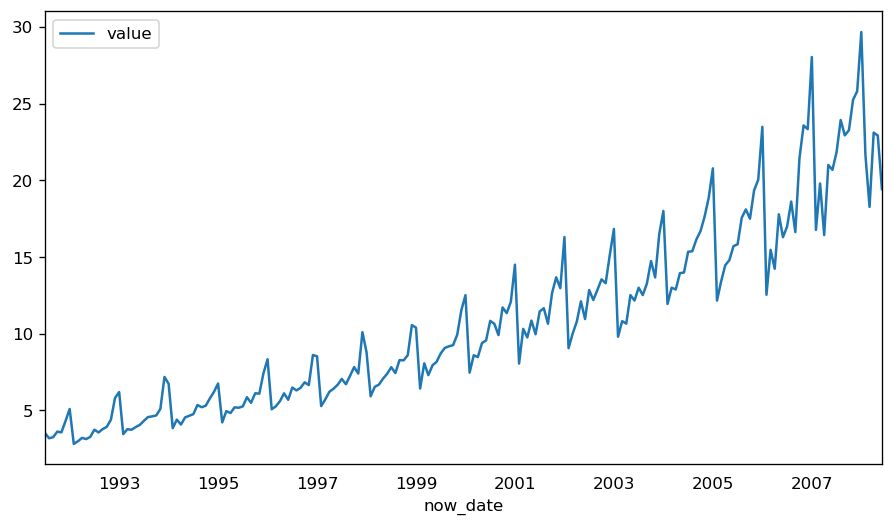

In [336]:
ts.plot(x = 'now_date', y='value')
plt.show()

# Time series analysis

In [379]:
#Australian Drug Sales data, free available dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [380]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

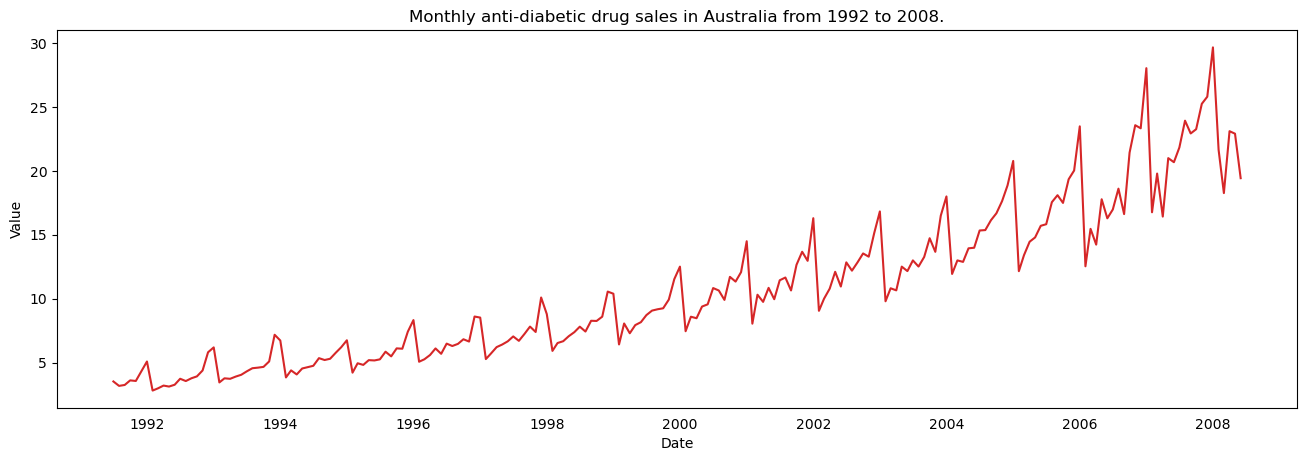

In [381]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.date, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

### Seasonality

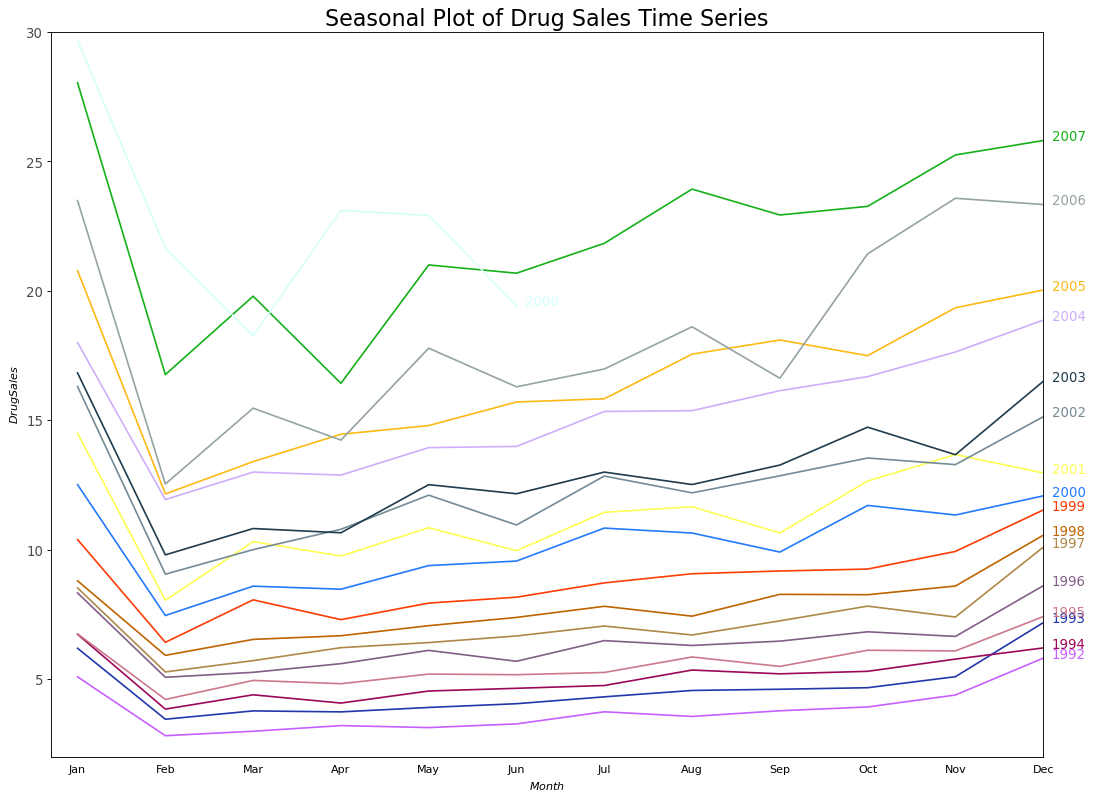

In [382]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

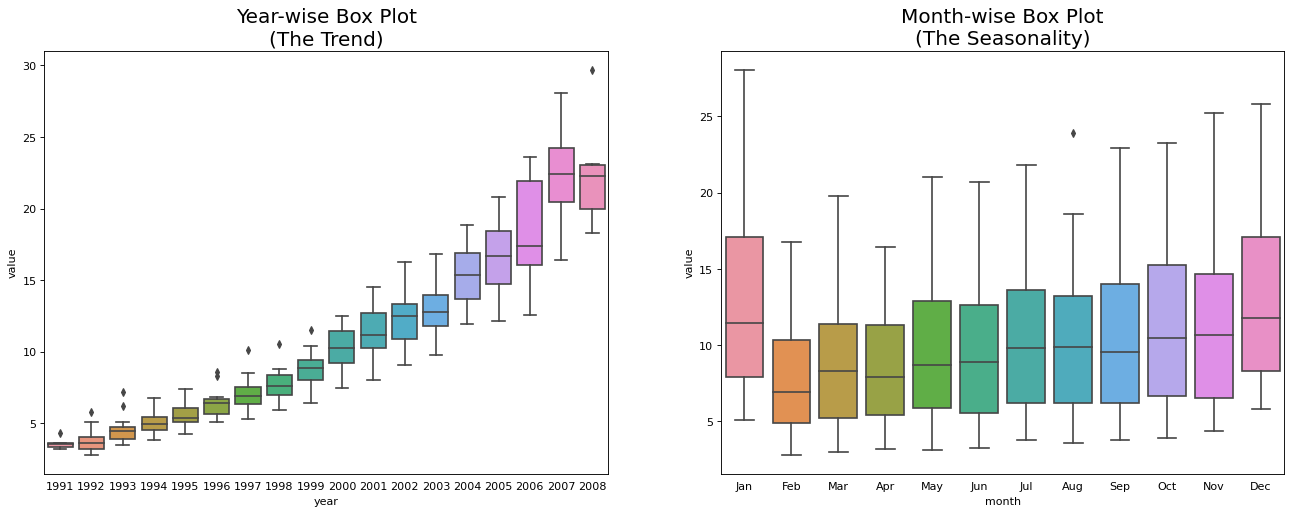

In [383]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

In [385]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [386]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [387]:
df = df.set_index('date')

### Multiplicative Time Series:
### Value = Base Level x Trend x Seasonality x Error

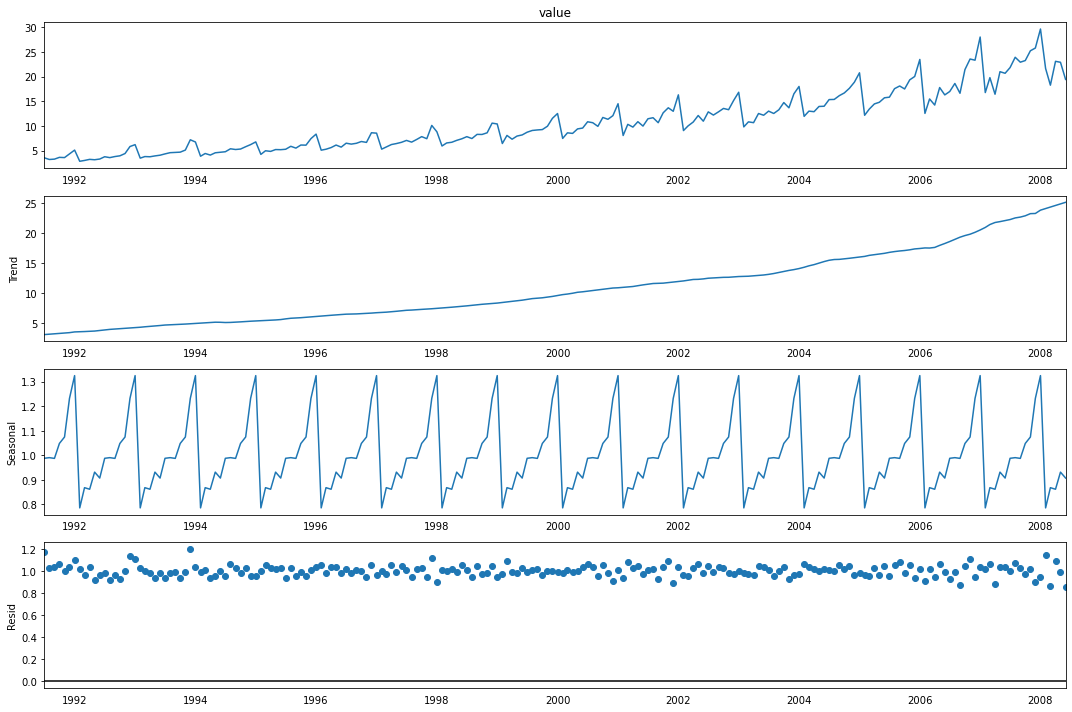

In [388]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,10)})
result_mul.plot()
plt.show()

### Additive time series:
### Value = Base Level + Trend + Seasonality + Error

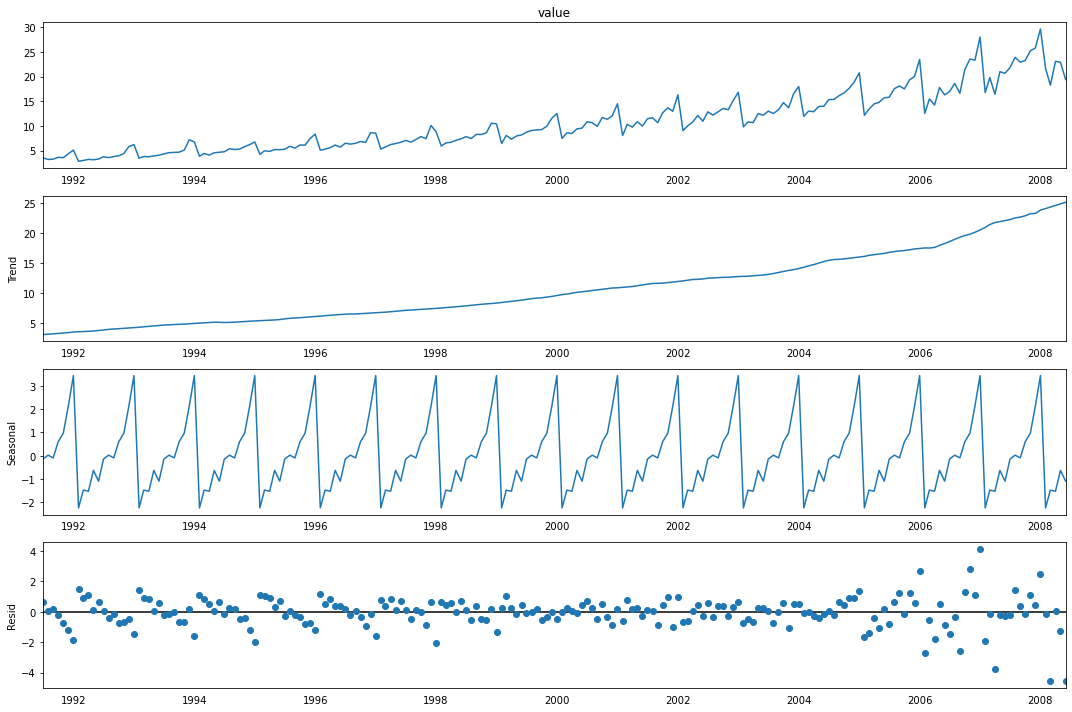

In [389]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (15,10)})
result_add.plot()
plt.show()

### the residuals of the additive decomposition has some pattern left over. 
### the multiplicative decomposition looks quite random 
### in this case: multiplicative decomposition should be preferred

In [153]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['season', 'trend', 'resid', 'actual']
df_reconstructed.head()

,season,trend,resid,actual
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


### Stationarity of a time series. 
#### A stationary series is one where the values of the series is not a function of time.

#### Forecasting a stationary series is relatively easy and the forecasts are more reliable.
#### The statistical properties of the series like mean, variance and autocorrelation are constant over time. 
#### Autocorrelation of the series is the correlation of the series with its previous values.


### Check the stationarity
#### ADF test, where assumed that the time series possesses is non-stationary if the P-Value is greater than the significance level

#### KPSS test, where assumed that the time series possesses is stationary and the P-Value interpretation is just the opposite of ADH test

In [154]:
from statsmodels.tsa.stattools import adfuller, kpss

In [155]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [156]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/allasapronova/opt/anaconda3/envs/sustain/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/allasapronova/opt/anaconda3/envs/sustain/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


## Detrending a time series is to remove the trend component from a time series.

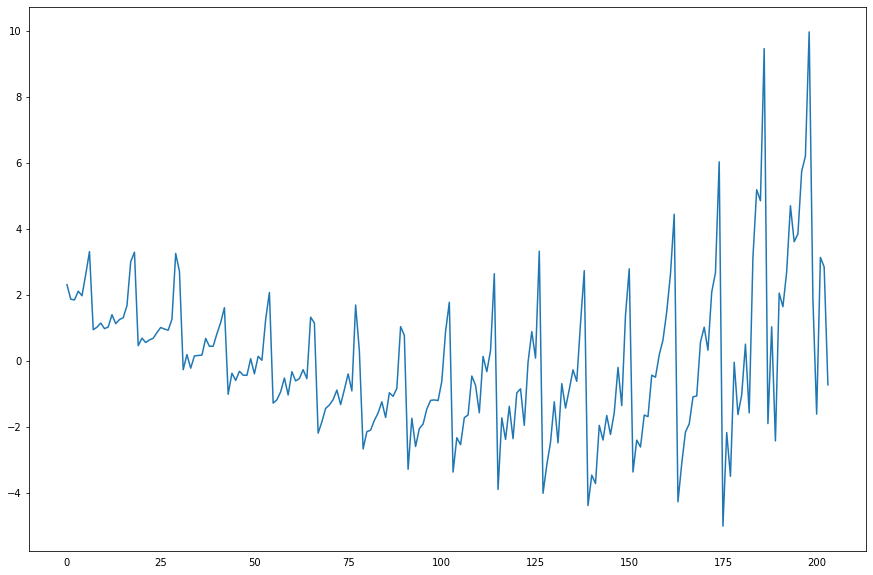

In [390]:
# Using scipy: Subtract the line of best fit
# (The line of best fit may be obtained from a linear regression model with the time steps as the predictor.)

from scipy import signal
detrended = signal.detrend(df.value.values)
plt.plot(detrended)

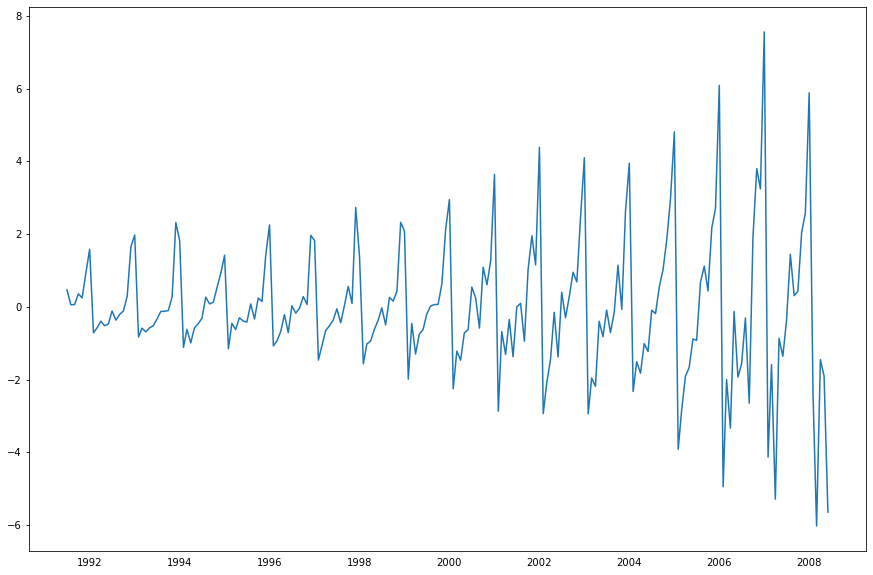

In [391]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)

## Test for seasonality of a time series

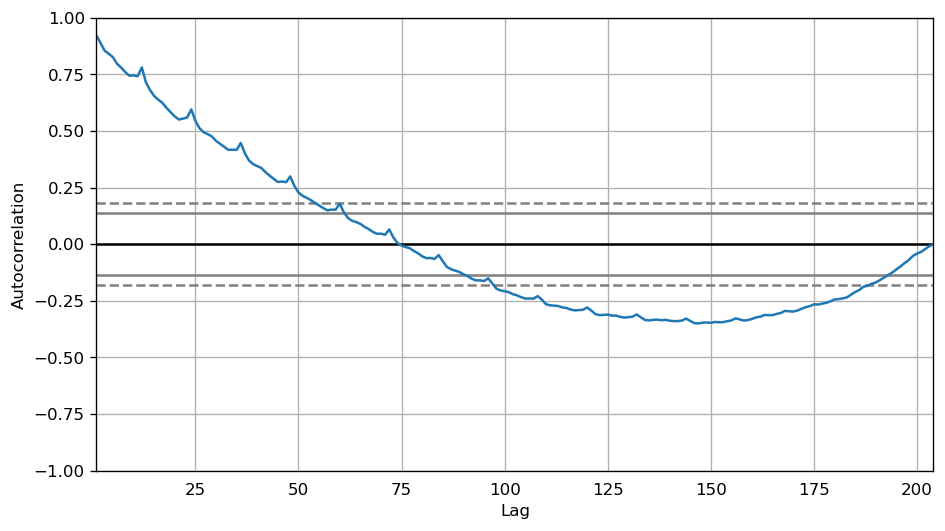

In [392]:
# use the Autocorrelation Function (ACF) plot
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

## Deseasonalize a time series:

### Take a moving average with length as the seasonal window. This will smoothen in series in the process.

### Seasonal difference the series (subtract the value of previous season from the current value)

### Divide the series by the seasonal index obtained from STL decomposition

[]

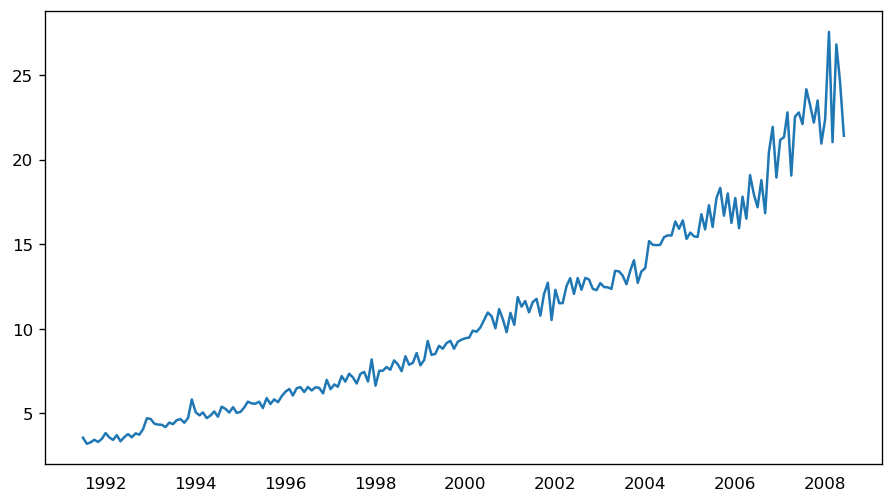

In [393]:
# Subtracting the Trend Component.

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.plot()